In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the csv file
df=pd.read_csv('heart_disease.csv')
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [3]:
cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [4]:
#assigning the column names
df=pd.read_csv('heart_disease.csv',names=cols,header=None)

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [6]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [7]:
df['slope'].value_counts()

1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64

In [8]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [9]:
df.shape

(303, 14)

In [10]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [11]:
#looking for the null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
#dropping the rows that have null values
df.drop(df[df['ca']== '?'].index, inplace = True)

In [13]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [14]:
#dropping the rows that have null values
df.drop(df[df['thal']== '?'].index, inplace = True)

In [15]:
df['thal'].value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

In [16]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BB1E74D48>,
      dtype=object)

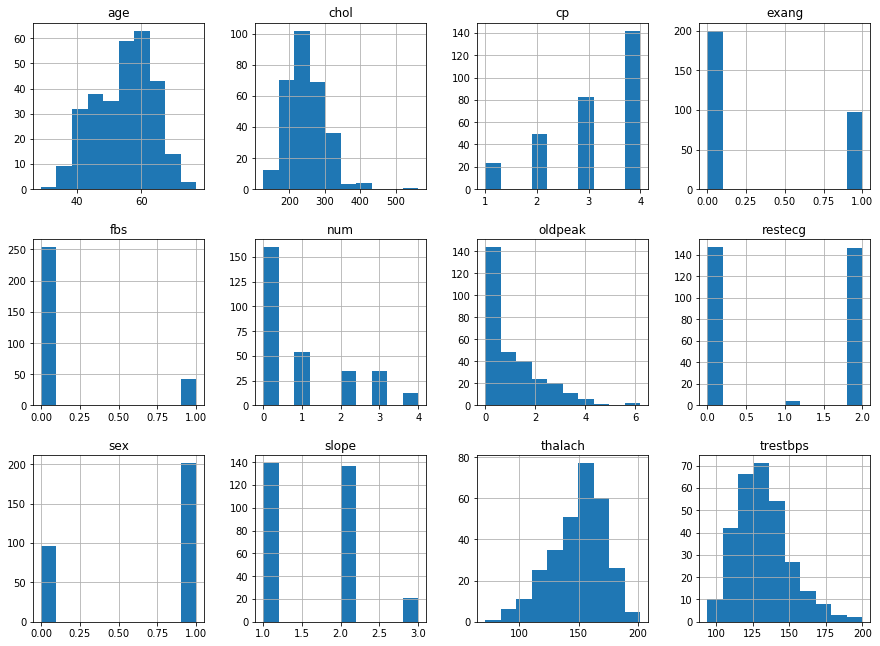

In [17]:
df.hist(grid=True,figsize=(15,15),layout=(4,4))

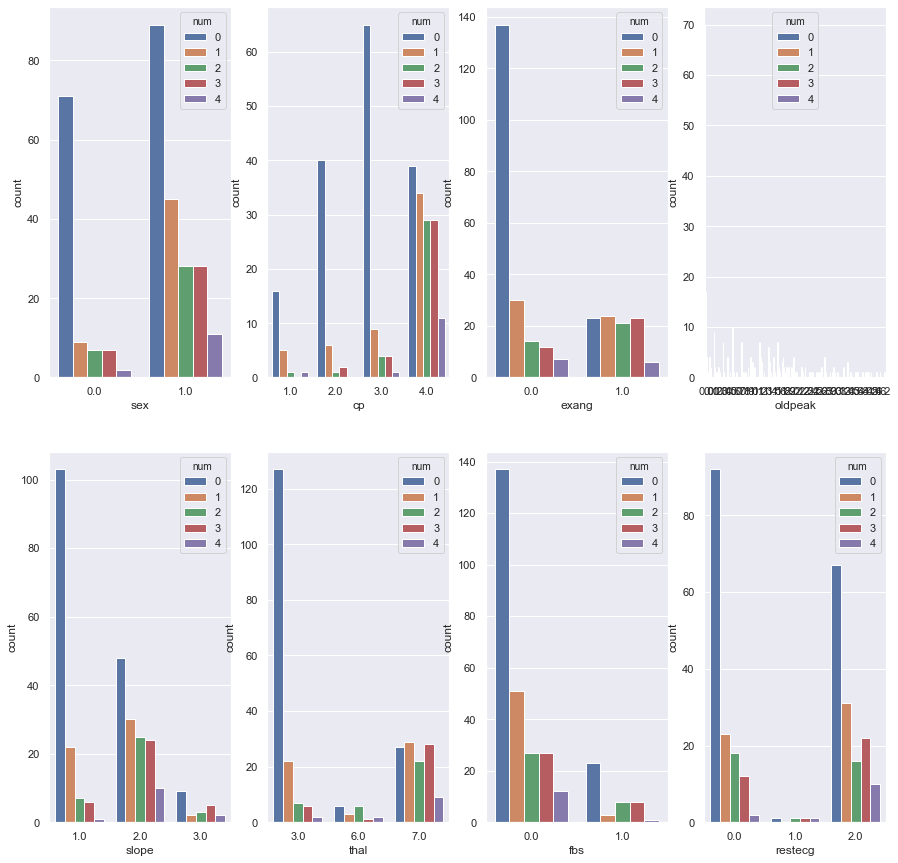

In [18]:
sns.set(font_scale=1.0)
fig,axes=plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(15,15)
sns.countplot(x='sex',hue='num',data=df,ax=axes[0][0])
sns.countplot(x='cp',hue='num',data=df,ax=axes[0][1])
sns.countplot(x='exang',hue='num',data=df,ax=axes[0][2])
sns.countplot(x='oldpeak',hue='num',data=df,ax=axes[0][3])
sns.countplot(x='slope',hue='num',data=df,ax=axes[1][0])
sns.countplot(x='thal',hue='num',data=df,ax=axes[1][1])
sns.countplot(x='fbs',hue='num',data=df,ax=axes[1][2])
sns.countplot(x='restecg',hue='num',data=df,ax=axes[1][3])

In [19]:
# found that the males are having high heart disease.Also positive exercisedinducedangina increases chances of hear disease. 
#Further asymptotic chest pain increases chances of heart disease
#flat slope and downsloping increases chances of heart disease
#reversable defect in thal are proned tp hear disease

In [20]:
df[['age','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']].groupby(['num'],as_index=False).mean()

,num,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0,52.643750,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500
1,1,55.611111,3.333333,133.277778,249.148148,0.055556,1.148148,145.981481,0.444444,1.022222,1.629630
2,2,58.200000,3.742857,134.371429,260.857143,0.228571,0.942857,135.000000,0.600000,1.802857,1.885714
3,3,56.000000,3.771429,135.457143,246.457143,0.228571,1.285714,132.057143,0.657143,1.962857,1.971429
4,4,59.692308,3.692308,138.769231,253.384615,0.076923,1.615385,140.615385,0.461538,2.361538,2.076923


In [21]:
#checking the skewness
df.skew()

age        -0.219775
sex        -0.759727
cp         -0.844412
trestbps    0.700070
chol        1.118096
fbs         2.029240
restecg     0.006768
thalach    -0.536540
exang       0.743256
oldpeak     1.247131
slope       0.510444
ca          1.179548
thal        0.247772
num         1.046557
dtype: float64

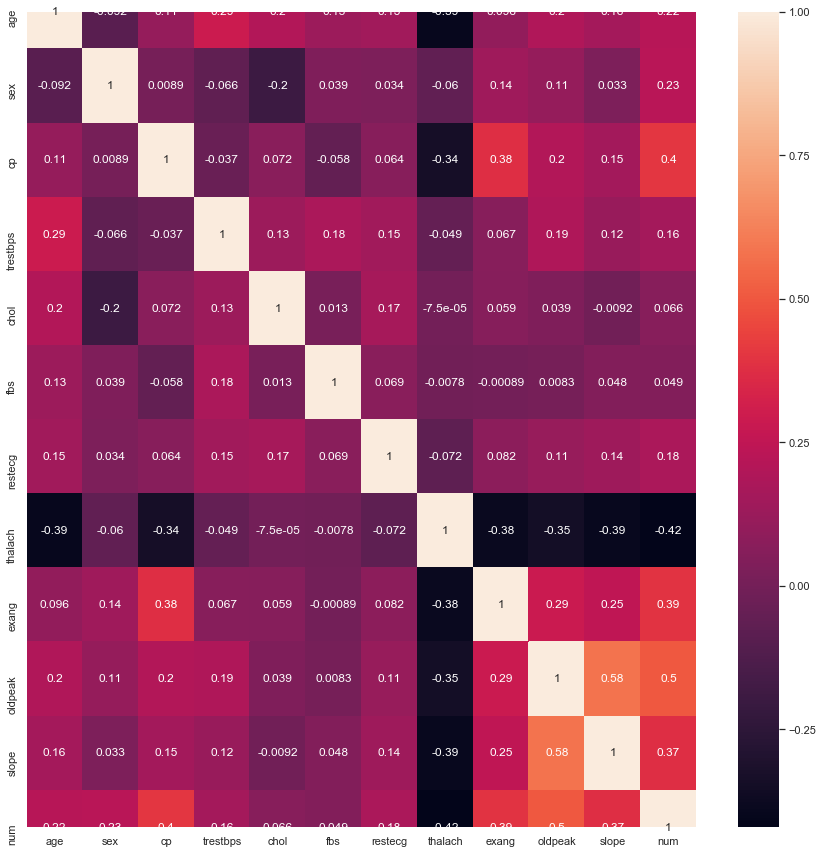

In [22]:
hmap=df.corr()
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(hmap,ax=ax,annot=True)

In [23]:
df['sex'] = df['sex'].astype('object')
df['slope'] = df['slope'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['cp'] = df['cp'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')


In [24]:
#classifying the categorical variables
ca= pd.get_dummies(df['ca'], prefix = "ca")
df=pd.concat([df,ca],axis=1)

thal = pd.get_dummies(df['thal'], prefix = "thal")
df=pd.concat([df,thal],axis=1)

cp = pd.get_dummies(df['cp'], prefix = "cp")
df=pd.concat([df,cp],axis=1)

slope = pd.get_dummies(df['slope'], prefix = "slope")
df=pd.concat([df,slope],axis=1)

sex = pd.get_dummies(df['sex'], prefix = "sex")
df=pd.concat([df,sex],axis=1)

exang = pd.get_dummies(df['exang'], prefix = "exang")
df=pd.concat([df,exang],axis=1)

fbs = pd.get_dummies(df['fbs'], prefix = "fbs")
df=pd.concat([df,fbs],axis=1)

restecg = pd.get_dummies(df['restecg'], prefix = "restecg")
df=pd.concat([df,restecg],axis=1)



In [25]:
df=df.drop(['ca','thal','cp','slope','sex','exang','fbs','restecg'],axis=1)

In [26]:
#classifying the target variable in 0 and 1
df['num']=np.where(df['num']>=1,1,0)

In [27]:
df['num'].value_counts()

0    160
1    137
Name: num, dtype: int64

In [28]:

df.head()

,age,trestbps,chol,thalach,oldpeak,num,ca_0.0,ca_1.0,ca_2.0,ca_3.0,...,slope_3.0,sex_0.0,sex_1.0,exang_0.0,exang_1.0,fbs_0.0,fbs_1.0,restecg_0.0,restecg_1.0,restecg_2.0
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,...,1,0,1,1,0,0,1,0,0,1
1,67.0,160.0,286.0,108.0,1.5,1,0,0,0,1,...,0,0,1,0,1,1,0,0,0,1
2,67.0,120.0,229.0,129.0,2.6,1,0,0,1,0,...,0,0,1,0,1,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,0,...,1,0,1,1,0,1,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [29]:
y=df.iloc[:,5:6]
y.head()

,num
0,0
1,1
2,1
3,0
4,0


In [30]:
x=df.drop(['num'],axis=1)
x.head()

,age,trestbps,chol,thalach,oldpeak,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,...,slope_3.0,sex_0.0,sex_1.0,exang_0.0,exang_1.0,fbs_0.0,fbs_1.0,restecg_0.0,restecg_1.0,restecg_2.0
0,63.0,145.0,233.0,150.0,2.3,1,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
1,67.0,160.0,286.0,108.0,1.5,0,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
2,67.0,120.0,229.0,129.0,2.6,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,1,0,0,0,1,...,1,0,1,1,0,1,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,0,1,...,0,1,0,1,0,1,0,0,0,1


In [31]:
#using standard scaler techniques to scaled the values to -1 and 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [32]:
x=pd.DataFrame(data=x)

In [33]:
#using PCA technique 
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x=pca.fit_transform(x)

In [34]:
max_ascore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    a_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state,"is:",a_scr)
    if a_scr>max_ascore:
        max_ascore=a_scr
        final_r_state=r_state
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_ascore)

accuracy_score corresponding to random state: 42 is: 0.8833333333333333
accuracy_score corresponding to random state: 43 is: 0.8166666666666667
accuracy_score corresponding to random state: 44 is: 0.8
accuracy_score corresponding to random state: 45 is: 0.8666666666666667
accuracy_score corresponding to random state: 46 is: 0.9166666666666666
accuracy_score corresponding to random state: 47 is: 0.75
accuracy_score corresponding to random state: 48 is: 0.8333333333333334
accuracy_score corresponding to random state: 49 is: 0.8666666666666667
accuracy_score corresponding to random state: 50 is: 0.8666666666666667
accuracy_score corresponding to random state: 51 is: 0.8166666666666667
accuracy_score corresponding to random state: 52 is: 0.8166666666666667
accuracy_score corresponding to random state: 53 is: 0.8166666666666667
accuracy_score corresponding to random state: 54 is: 0.7
accuracy_score corresponding to random state: 55 is: 0.8333333333333334
accuracy_score corresponding to rand

In [35]:
#using support vector model
from sklearn.svm import SVC
model=SVC(kernel='rbf')
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 200]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': Cs, 'gamma' : gammas}
grid1_search = GridSearchCV(model, param_grid, cv=3)

In [36]:
grid1_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
grid1_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
from sklearn.metrics import f1_score
model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8312236286919831
The F1 Score is: 0.8307639453412302
The score is: 0.9
The F1 Score is: 0.9009049773755657


In [39]:
# using the decision tree model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
sample_split_range = list(range(2, 50))
param_grid2 = dict(min_samples_split=sample_split_range)
grid2_search=GridSearchCV(dtc, param_grid2, cv=10, scoring='accuracy')

In [40]:
grid2_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 1

In [41]:
grid2_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
#using decision tree model
from sklearn.metrics import f1_score
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = dtc.predict(x)
    score = dtc.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8860759493670886
The F1 Score is: 0.8859542204650178
The score is: 0.75
The F1 Score is: 0.7524640946212334


In [49]:
#using ensemble technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
model_new=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25],    
    'min_samples_leaf': [1, 2, 4, 10, 15 ],
    'min_samples_split': [2, 5, 10, 20],
    'n_estimators': [25, 50, 100, 200]}

grid_search = GridSearchCV(model_new, params, cv = 3)

In [51]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [52]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
model_new = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model_new.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model_new.predict(x)
    score = model_new.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)
        
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.8312236286919831
The F1 Score is: 0.8307639453412302
The score is: 0.9166666666666666
The F1 Score is: 0.917306052855925


In [58]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print('Score:',score)

Score: [0.81666667 0.9        0.76271186 0.81355932 0.76271186]


In [47]:
#further check that the Support Vector Classifier is giving te best results

In [59]:
from sklearn.externals import joblib
joblib.dump(model,'heartdisease_classification.pkl')

['heartdisease_classification.pkl']